# **Importing libraries and reading the dataset**

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_test = pd.read_csv("X_test.csv")
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")

# **Model Evaluaation**

In [9]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": lgb.LGBMClassifier(),
}

results = {
    "Modèle": ["LightGBM", "Random Forest", "XGBoost"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": [],
    "ROC-AUC": [],
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    results["Accuracy"].append(accuracy_score(Y_test, Y_pred))
    results["Precision"].append(precision_score(Y_test, Y_pred))
    results["Recall"].append(recall_score(Y_test, Y_pred))
    results["F1-score"].append(f1_score(Y_test, Y_pred))
    results["ROC-AUC"].append(roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))


    #print(f"📊 {name} Performance:")
    #print("Accuracy:", accuracy_score(Y_test, Y_pred))
    #print("Precision:", precision_score(Y_test, Y_pred))
    #print("Recall:", recall_score(Y_test, Y_pred))
    #print("F1-score:", f1_score(Y_test, Y_pred))
    #print("ROC-AUC:", roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))
    #print("-" * 40)'''


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[LightGBM] [Info] Number of positive: 77, number of negative: 162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.322176 -> initscore=-0.743791
[LightGBM] [Info] Start training from score -0.743791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## **Visualizing**

In [10]:
# Afficher les résultats
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


          Modèle  Accuracy  Precision    Recall  F1-score   ROC-AUC
0       LightGBM  0.816667   0.785714  0.578947  0.666667  0.892169
1  Random Forest  0.833333   0.846154  0.578947  0.687500  0.826701
2        XGBoost  0.816667   0.785714  0.578947  0.666667  0.836970


# **Bar chart**

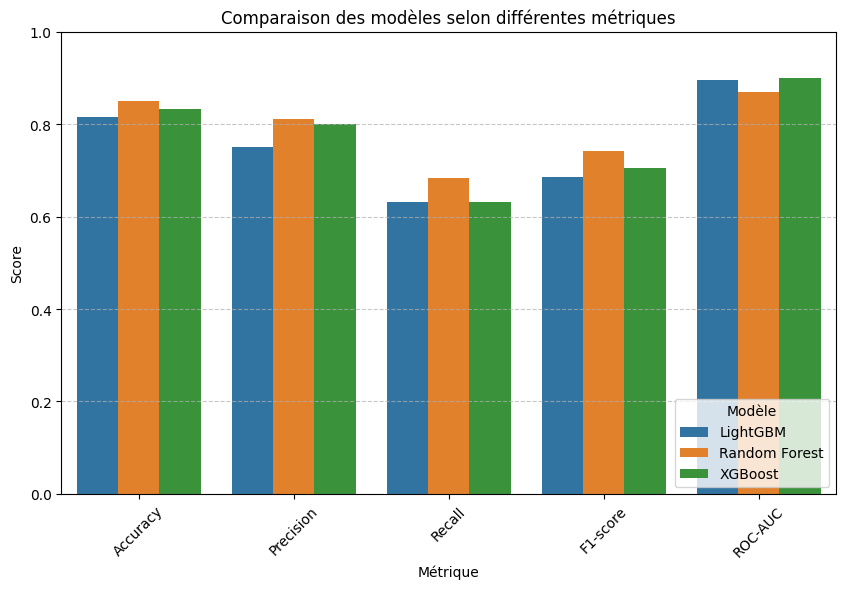

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mise en forme des données pour seaborn
df_melted = df_results.melt(id_vars="Modèle", var_name="Métrique", value_name="Score")

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Métrique", y="Score", hue="Modèle")

# Personnalisation
plt.title("Comparaison des modèles selon différentes métriques")
plt.ylim(0, 1)  # Les scores vont de 0 à 1
plt.legend(title="Modèle", loc="lower right")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.show()


# **Confusion matrix**

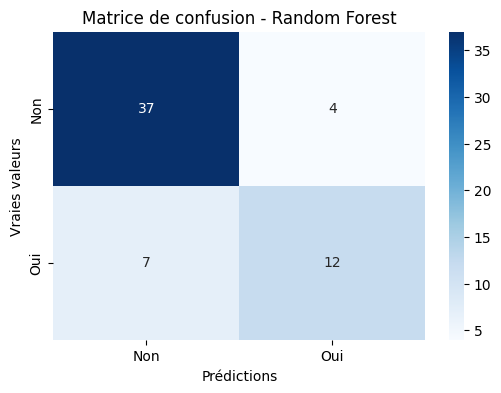

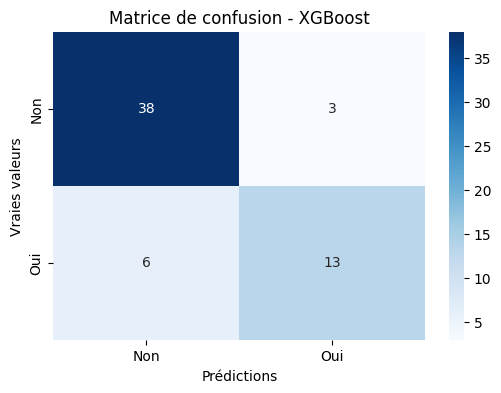

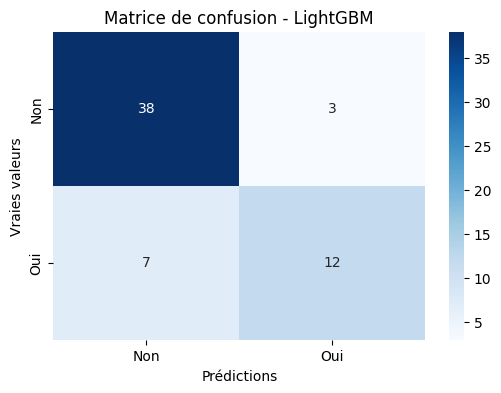

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
for name, model in models.items():
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)

    # Affichage avec seaborn
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies valeurs")
    plt.title("Matrice de confusion - " + name) # Added + operator to concatenate strings
    plt.show()